### can be done

Remove Null Values by replacing with suitable number​

Encode categorical variables into numerical variables​

Normalize and scale features​

Remove Children that appear more than once 

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) 

In [3]:
# data loading

def import_excel(file_path):
  # Load the Excel file
  xls = pd.ExcelFile(file_path)

  # Create a dictionary to store DataFrames
  dataframe = {}

  # Iterate through each sheet in the Excel file
  for sheet_name in xls.sheet_names:
      # Read each sheet into a DataFrame
      df = pd.read_excel(file_path, sheet_name=sheet_name)
      # Store the DataFrame with the sheet name as the key in the dictionary
      dataframe[sheet_name] = df
  return dataframe

# Now you have a dictionary where each key is the sheet name, and the value is the corresponding DataFrame
# For example, to access the DataFrame for the sheet named 'Sheet1':

# df_nigeria: basic info about nigeria dataset
# df_nigeria_add: contains sel data
df_nigeria = import_excel(r'Nigeria CuC Data - 2024 10 08.xlsx')
print("df_nigeria sheets " + str(df_nigeria.keys()))
df_nigeria_add = import_excel(r'Nigeria-Additional Data - 2024 10 15.xlsx')
print("df_nigeria_add sheets " + str(df_nigeria_add.keys()))

# loop through the dictionary and convert to dataframe



df_nigeria sheets dict_keys(['_fact_student_attendance', 'Note', '_fact_classes', '_dim_students', '_fact_reading_result', '_fact_student_reporting_rate'])
df_nigeria_add sheets dict_keys(['Literacy'])


In [4]:
# df_nigeria_add
df_sel = df_nigeria_add['Literacy']
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86998 entries, 0 to 86997
Data columns (total 65 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   86998 non-null  int64  
 1   AcademicYearName                                 86998 non-null  object 
 2   SchoolId                                         86998 non-null  int64  
 3   ClassId                                          86998 non-null  int64  
 4   ChildrenId                                       86998 non-null  int64  
 5   DeleteReasonId                                   593 non-null    float64
 6   CommunicationIssue                               41749 non-null  object 
 7   MemoryConcentration                              41749 non-null  object 
 8   Hearing                                          41749 non-null  object 
 9   Vision                      

In [5]:
# contains 86998 child - only 10228 have sel data
df_sel = df_sel[df_sel['SELMatrix_Get_along_with_people'].notnull()]
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10228 entries, 66477 to 86997
Data columns (total 65 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   10228 non-null  int64  
 1   AcademicYearName                                 10228 non-null  object 
 2   SchoolId                                         10228 non-null  int64  
 3   ClassId                                          10228 non-null  int64  
 4   ChildrenId                                       10228 non-null  int64  
 5   DeleteReasonId                                   0 non-null      float64
 6   CommunicationIssue                               10228 non-null  object 
 7   MemoryConcentration                              10228 non-null  object 
 8   Hearing                                          10228 non-null  object 
 9   Vision                       

In [6]:
has_duplicates = df_sel['ChildrenId'].duplicated().any()
# has_duplicates np.True_ 有重复值

df_duplicates = df_sel[df_sel['ChildrenId'].duplicated(keep=False)]
df_duplicates
#df_duplicates cycle都是一致的，可能是typo吧，直接删除

,AcademicYearId,AcademicYearName,SchoolId,ClassId,ChildrenId,DeleteReasonId,CommunicationIssue,MemoryConcentration,Hearing,Vision,Selfcare,Walking/Climbing,IsElectricityAvailable?,IsRadioTVAvailable?,IsTelephoneAvailable?,ChildrenGrade,IsCUCSatisfied?,ChildrenAge,ChildrenGender,OOSC_Child,HasTelevision,IsBikeAvailable?,IsOx-cartAvailable?,HasMotorcycle,self_esteem_life_skills,skills_abilities,compare_others,life_goal,SELMatrix_Get_along_with_people,SELMatrix_Educations_is_important,SELMatrix_Behave_in_different_situations,SELMatrix_Parents_caregiver_take_care,SELMatrix_Parents_caregiver_know_a_lot_about_me,SELMatrix_Hungry,SELMatrix_People_like_to_spend_time_with_me,SELMatrix_Talk_to_family_when_feelings,SELMatrix_Friends_support,SELMatrix_Get_along_at_school,SELMatrix_Parents_caregiver_care_to_me,SELMatrix_Friends_care_about_me,SELMatrix_Treat_fairly_at_community,SELMatrix_Chance_to_show_the_growth,SELMatrix_Feel_safe_with_family,SELMatrix_Chance_to_learn,SELMatrix_likely_to_celebrate,menustral_cycle,menustral_cloth,menustral_normal,menustral_bathing,menustral_age,menustral_frequency,other_social_effects,other_psychological_effects,student_identity_type,student_identity_no,PrimaryCareGiver,PrimaryCareGiverOther,PrimaryCareGiverOtherRelation,BirthOrder,BirthOrderOther,HomeLanguage,HomeLanguageOther,Year,Cycle,Project
82583,9,2024-CuC & VYA-Cycle 1,134,292,17137,NaN,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,No,No,No,Grade 4,NaN,12.0,Female,1-3_months_ago,No,No,No,No,6.0,NaN,NaN,NaN,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,1.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,Birth_Certificate,0,Father,NaN,NaN,6,NaN,Hausa,NaN,2024,1,Plane
83811,9,2024-CuC & VYA-Cycle 1,134,292,17137,NaN,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,No,No,No,Grade 3,NaN,12.0,Female,1-3_months_ago,No,No,No,No,8.0,NaN,NaN,NaN,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,Not_Available,NaN,Father,NaN,NaN,6,NaN,Hausa,NaN,2024,1,Plane


In [7]:
df_sel = df_sel.drop(df_duplicates.index)
df_sel = df_sel.dropna(axis=1, how='all')
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10226 entries, 66477 to 86997
Data columns (total 63 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   10226 non-null  int64  
 1   AcademicYearName                                 10226 non-null  object 
 2   SchoolId                                         10226 non-null  int64  
 3   ClassId                                          10226 non-null  int64  
 4   ChildrenId                                       10226 non-null  int64  
 5   CommunicationIssue                               10226 non-null  object 
 6   MemoryConcentration                              10226 non-null  object 
 7   Hearing                                          10226 non-null  object 
 8   Vision                                           10226 non-null  object 
 9   Selfcare                     

If a person skips or misses an item, their scores should not be automatically computed, as their overall score will be artificially lower than others who complete the measure. If this happens, you can discard the incomplete result or consider methods of managing missing data
- 没有

### SCORING：

#### total score of an individual’s resilience

the items within the measures can be directly summed. For an unmodified 3-point measure, the minimum score is 17 and the maximum score is 51.

#### Personal Resilience Subscale Scores

sum 10 items: 1, 2, 3, 7, 9, 10, 12, 13, 14, 16. 

#### Caregiver/Relational Resilience Subscale Scores

sum 7 items: 4, 5, 6, 8, 11, 15, 17. 

### EVALUATING METHODS

#### indication

For the overall measure and subscales, higher scores indicate characteristics associated with stronger resilience."

#### comparing differences
"We recommend *comparing high scorers to low scorers* and investigating *potential reasons* for these differences. You may wish to *rank your sample by score* and *contrast the top half of scorers against the lower half* to determine what might account for these differences.

#### categorical analysis
consider that individuals scoring greater than one standard deviation above your sample average have *‘higher resilience’*, those between one standard deviation above and below the average have *‘moderate resilience’*, and those below one standard deviation have *‘low resilience’*.

In [8]:
df_sel.columns

Index(['AcademicYearId', 'AcademicYearName', 'SchoolId', 'ClassId',
       'ChildrenId', 'CommunicationIssue', 'MemoryConcentration', 'Hearing',
       'Vision', 'Selfcare', 'Walking/Climbing', 'IsElectricityAvailable?',
       'IsRadioTVAvailable?', 'IsTelephoneAvailable?', 'ChildrenGrade',
       'ChildrenAge', 'ChildrenGender', 'OOSC_Child', 'HasTelevision',
       'IsBikeAvailable?', 'IsOx-cartAvailable?', 'HasMotorcycle',
       'self_esteem_life_skills', 'skills_abilities', 'compare_others',
       'life_goal', 'SELMatrix_Get_along_with_people',
       'SELMatrix_Educations_is_important',
       'SELMatrix_Behave_in_different_situations',
       'SELMatrix_Parents_caregiver_take_care',
       'SELMatrix_Parents_caregiver_know_a_lot_about_me', 'SELMatrix_Hungry',
       'SELMatrix_People_like_to_spend_time_with_me',
       'SELMatrix_Talk_to_family_when_feelings', 'SELMatrix_Friends_support',
       'SELMatrix_Get_along_at_school',
       'SELMatrix_Parents_caregiver_care_to_me',


In [9]:
# use two types of scoring
df_sel['SELMatrix_Get_along_with_people'].unique()

array(['Yes', 'Sometimes', 'No', 'A_lot', 'Quite_a_bit', 'A_little',
       'Somewhat', 'Not_at_all'], dtype=object)

In [10]:
three_scoring = ['Yes', 'Sometimes', 'No']
five_scoring = ['A_lot', 'Quite_a_bit', 'A_little', 'Somewhat', 'Not_at_all']
df_sel_three_scoring = df_sel[df_sel['SELMatrix_Get_along_with_people'].isin(three_scoring)]
df_sel_five_scoring = df_sel[df_sel['SELMatrix_Get_along_with_people'].isin(five_scoring)]

In [11]:
df_sel_three_scoring.head()

,AcademicYearId,AcademicYearName,SchoolId,ClassId,ChildrenId,CommunicationIssue,MemoryConcentration,Hearing,Vision,Selfcare,Walking/Climbing,IsElectricityAvailable?,IsRadioTVAvailable?,IsTelephoneAvailable?,ChildrenGrade,ChildrenAge,ChildrenGender,OOSC_Child,HasTelevision,IsBikeAvailable?,IsOx-cartAvailable?,HasMotorcycle,self_esteem_life_skills,skills_abilities,compare_others,life_goal,SELMatrix_Get_along_with_people,SELMatrix_Educations_is_important,SELMatrix_Behave_in_different_situations,SELMatrix_Parents_caregiver_take_care,SELMatrix_Parents_caregiver_know_a_lot_about_me,SELMatrix_Hungry,SELMatrix_People_like_to_spend_time_with_me,SELMatrix_Talk_to_family_when_feelings,SELMatrix_Friends_support,SELMatrix_Get_along_at_school,SELMatrix_Parents_caregiver_care_to_me,SELMatrix_Friends_care_about_me,SELMatrix_Treat_fairly_at_community,SELMatrix_Chance_to_show_the_growth,SELMatrix_Feel_safe_with_family,SELMatrix_Chance_to_learn,SELMatrix_likely_to_celebrate,menustral_cycle,menustral_cloth,menustral_normal,menustral_bathing,menustral_age,menustral_frequency,other_social_effects,other_psychological_effects,student_identity_type,student_identity_no,PrimaryCareGiver,PrimaryCareGiverOther,PrimaryCareGiverOtherRelation,BirthOrder,BirthOrderOther,HomeLanguage,HomeLanguageOther,Year,Cycle,Project
66477,13,2024-CuC & VYA-Cycle2,118,369,35577,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,NaN,NaN,NaN,Grade 5,12.0,Male,NaN,NaN,NaN,NaN,NaN,7.0,Neutral,Never,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,Father,NaN,NaN,6,NaN,Others,Kaibi,2024,2,Plane
66478,13,2024-CuC & VYA-Cycle2,132,332,28905,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,NaN,NaN,NaN,Unknown,12.0,Female,Was in school 1-3 months ago,NaN,NaN,NaN,NaN,5.0,Neutral,Occasionally,Yes,Sometimes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Sometimes,Yes,Yes,Sometimes,Yes,Sometimes,Yes,Yes,Yes,0.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Grandmother,NaN,NaN,1,NaN,Hausa,NaN,2024,2,Plane
66479,13,2024-CuC & VYA-Cycle2,116,362,35381,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,NaN,NaN,NaN,Unknown,11.0,Male,Was in school 7-9 months ago,NaN,NaN,NaN,NaN,3.0,High confidence,Never,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,Father,NaN,NaN,3,NaN,Hausa,NaN,2024,2,Plane
66480,13,2024-CuC & VYA-Cycle2,132,332,28906,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,NaN,NaN,NaN,Grade 6,11.0,Female,NaN,NaN,NaN,NaN,NaN,6.0,Neutral,Occasionally,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,Father,NaN,NaN,4,NaN,Hausa,NaN,2024,2,Plane
66481,13,2024-CuC & VYA-Cycle2,132,332,28908,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,NaN,NaN,NaN,Grade 6,12.0,Female,NaN,NaN,NaN,NaN,NaN,7.0,Neutral,Occasionally,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,Father,NaN,NaN,2,NaN,Hausa,NaN,2024,2,Plane


In [12]:
df_sel_five_scoring.head()

,AcademicYearId,AcademicYearName,SchoolId,ClassId,ChildrenId,CommunicationIssue,MemoryConcentration,Hearing,Vision,Selfcare,Walking/Climbing,IsElectricityAvailable?,IsRadioTVAvailable?,IsTelephoneAvailable?,ChildrenGrade,ChildrenAge,ChildrenGender,OOSC_Child,HasTelevision,IsBikeAvailable?,IsOx-cartAvailable?,HasMotorcycle,self_esteem_life_skills,skills_abilities,compare_others,life_goal,SELMatrix_Get_along_with_people,SELMatrix_Educations_is_important,SELMatrix_Behave_in_different_situations,SELMatrix_Parents_caregiver_take_care,SELMatrix_Parents_caregiver_know_a_lot_about_me,SELMatrix_Hungry,SELMatrix_People_like_to_spend_time_with_me,SELMatrix_Talk_to_family_when_feelings,SELMatrix_Friends_support,SELMatrix_Get_along_at_school,SELMatrix_Parents_caregiver_care_to_me,SELMatrix_Friends_care_about_me,SELMatrix_Treat_fairly_at_community,SELMatrix_Chance_to_show_the_growth,SELMatrix_Feel_safe_with_family,SELMatrix_Chance_to_learn,SELMatrix_likely_to_celebrate,menustral_cycle,menustral_cloth,menustral_normal,menustral_bathing,menustral_age,menustral_frequency,other_social_effects,other_psychological_effects,student_identity_type,student_identity_no,PrimaryCareGiver,PrimaryCareGiverOther,PrimaryCareGiverOtherRelation,BirthOrder,BirthOrderOther,HomeLanguage,HomeLanguageOther,Year,Cycle,Project
82482,9,2024-CuC & VYA-Cycle 1,113,371,13351,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,No,No,No,Grade 3,9.0,Female,4-6_months_ago,No,No,No,No,5.0,NaN,NaN,NaN,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,Not_Available,NaN,Father,NaN,NaN,4,NaN,Hausa,NaN,2024,1,Plane
82483,9,2024-CuC & VYA-Cycle 1,114,383,16042,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,No,No,No,Grade 3,12.0,Male,4-6_months_ago,No,No,No,No,6.0,NaN,NaN,NaN,A_lot,A_lot,Quite_a_bit,Quite_a_bit,A_lot,Quite_a_bit,A_lot,A_lot,A_lot,Quite_a_bit,Quite_a_bit,A_lot,A_little,A_lot,A_lot,A_lot,Quite_a_bit,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,Not_Available,NaN,Father,NaN,NaN,4,NaN,Hausa,NaN,2024,1,Plane
82484,9,2024-CuC & VYA-Cycle 1,114,383,16039,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,No,No,No,Grade 2,13.0,Male,4-6_months_ago,No,No,No,No,8.0,NaN,NaN,NaN,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,Quite_a_bit,Quite_a_bit,A_lot,Quite_a_bit,A_lot,A_lot,A_lot,Quite_a_bit,Quite_a_bit,A_lot,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,Not_Available,NaN,Father,NaN,NaN,4,NaN,Hausa,NaN,2024,1,Plane
82485,9,2024-CuC & VYA-Cycle 1,114,383,16037,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,No,No,No,Grade 3,9.0,Female,4-6_months_ago,No,No,No,Yes,5.0,NaN,NaN,NaN,Quite_a_bit,A_lot,Quite_a_bit,A_lot,A_lot,A_lot,Quite_a_bit,Quite_a_bit,A_lot,Quite_a_bit,A_lot,Quite_a_bit,A_lot,A_lot,Quite_a_bit,A_lot,A_lot,1.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,Not_Available,NaN,Father,NaN,NaN,5,NaN,Hausa,NaN,2024,1,Plane
82486,9,2024-CuC & VYA-Cycle 1,114,383,16034,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,No,No,No,Grade 2,9.0,Male,4-6_months_ago,No,No,No,No,9.0,NaN,NaN,NaN,A_lot,Quite_a_bit,A_lot,Quite_a_bit,Quite_a_bit,Quite_a_bit,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,Quite_a_bit,A_lot,A_lot,A_lot,Quite_a_bit,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,Not_Available,NaN,Father,NaN,NaN,2,NaN,Hausa,NaN,2024,1,Plane


In [13]:
# cycle different - check it
df_sel_five_scoring['AcademicYearName'].unique()
# array(['2024-CuC & VYA-Cycle 1'], dtype=object)
df_sel_three_scoring['AcademicYearName'].unique()
# array(['2024-CuC & VYA-Cycle2', '2024-CuC-Cycle2'], dtype=object)
skip_column = ['Project', 'Cycle', 'AcademicYearName', 'other_social_effects', 'other_psychological_effects', 'student_identity_no', 'PrimaryCareGiverOther', 'PrimaryCareGiverOtherRelation', 'BirthOrderOther', 'HomeLanguageOther']

df_sel_five_scoring = df_sel_five_scoring.dropna(axis=1, how='all')
df_sel_five_scoring = df_sel_five_scoring.drop(columns=skip_column)
df_sel_five_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4514 entries, 82482 to 86997
Data columns (total 50 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   4514 non-null   int64  
 1   SchoolId                                         4514 non-null   int64  
 2   ClassId                                          4514 non-null   int64  
 3   ChildrenId                                       4514 non-null   int64  
 4   CommunicationIssue                               4514 non-null   object 
 5   MemoryConcentration                              4514 non-null   object 
 6   Hearing                                          4514 non-null   object 
 7   Vision                                           4514 non-null   object 
 8   Selfcare                                         4514 non-null   object 
 9   Walking/Climbing              

In [14]:
df_sel_five_scoring['IsElectricityAvailable?'].unique()
# array(['No', 'Yes', "Don't_know"], dtype=object)
df_sel_five_scoring['Hearing'].unique()
# array(['No', 'Yes', "Don't_know"], dtype=object)
df_sel_five_scoring['ChildrenGrade'].unique()
# array(['Grade 3', 'Grade 2', 'Grade 1', 'Grade 7', 'Grade 5', 'Grade 6', 'Grade 4', 'Unknown', 'Grade 8', 'Grade 10'], dtype=object)
df_sel_five_scoring['ChildrenGender'].unique()
# array(['Female', 'Male'], dtype=object)
df_sel_five_scoring['OOSC_Child'].unique()
# array(['4-6_months_ago', '1-3_months_ago', '7-9_months_ago',1_month_ago', '10-12_months_ago', 'Never_went_to_school'], dtype=object)
df_sel_five_scoring['other_social_effects'].unique()
# array([nan, 'Diseases', 'Dark lips', 'Black lips, staggering', 'Normal', 'Staggering', 'Will die', 'No idea'], dtype=object)
df_sel_five_scoring['other_psychological_effects'].unique()
# array([nan, 'Metal disorder', 'Mental disorder', 'Mental disoder', 'Dirty appearance', 'They stagger when walking', 'Become mad'], dtype=object)
df_sel_five_scoring['student_identity_no'].unique()
# array([nan, 'Miracle Augustine', 2, 8, 9, 0, 17, 18, 11, 'Idris usaini',
#        13, 14, 15, 16, 4, 5, 7, 10, 12, 'Safina aliyu', 5919526,
#        'Umma liti', 3, '0000 see', 'Malam.Isa', 'Abdulhafiz Bashir', 1,
#        'Salima mamuda', 7017854523, 9047692933, 'Nil', 'Nin', 5919505,
#        5919510, 5326140, 1301238, 5927736, 41519734, 'No',
#        'A Rabi u abdullahi', '0000 no', 'Malan Abdullahi', 8085575372,
#        'Nik', 'Nil see', '0 buy I', '0 no', '0 hi', '0u', '0 no hi',
#        5326113, "Hauwa' ibrahim", 'Maryam salisu', '0 by j', '00000_'],
#       dtype=object)
# seems like misrecording - delete 
df_sel_five_scoring['PrimaryCareGiverOther'].unique()
# array([nan, 'Brother', 'Sister', 'Uncle', 'Stepmother', 'Broder'], dtype=object)
df_sel_five_scoring['PrimaryCareGiverOtherRelation'].unique()
# array([nan, 'Brother'], dtype=object)
df_sel_five_scoring['OOSC_Child'].unique()
# array(['4-6_months_ago', '1-3_months_ago', '7-9_months_ago', '1_month_ago', '10-12_months_ago', 'Never_went_to_school'], dtype=object)


KeyError: 'other_social_effects'

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols =['student_identity_type', 'PrimaryCareGiver', 'HomeLanguage']
for col in categorical_cols:
    df_sel_five_scoring[col] = label_encoder.fit_transform(df_sel_five_scoring[col])

In [16]:
difficulty_column = ['CommunicationIssue', 'MemoryConcentration', 'Hearing', 'Vision', 'Selfcare', 'Walking/Climbing']
binary_column = ['IsElectricityAvailable?', 'IsRadioTVAvailable?', 'IsTelephoneAvailable?','HasTelevision',
       'IsBikeAvailable?', 'IsOx-cartAvailable?', 'HasMotorcycle']

difficulty_dict = {'no_difficulty': 0, 'some_difficulty':1, 'lot_difficulty':2,'Cannot_do_at_all':3}
binary_dict = {'No':0, 'Yes':1, "Don't_know":2}
grade_dict = {'Grade 3':3, 'Grade 2':2, 'Grade 1':1, 'Grade 7':7, 'Grade 5':5, 'Grade 6':6,
       'Grade 4':4, 'Unknown':0, 'Grade 8':8, 'Grade 10':10}
gender_dict = {'Female':0, 'Male':1}
oosc_dict = {'4-6_months_ago':3, '1-3_months_ago':2, '7-9_months_ago':4, '1_month_ago':1, '10-12_months_ago':5, 'Never_went_to_school':0}
birth_dict = {'other_birthorder':0}
identity_dict = {'Not_Available':0, 'Birth_Certificate':1, 'NIN':2}

df_sel_five_scoring['student_identity_type'] = df_sel_five_scoring['student_identity_type'].replace(identity_dict).astype(int)
df_sel_five_scoring['BirthOrder'] = df_sel_five_scoring['BirthOrder'].replace(birth_dict).astype(int)
df_sel_five_scoring['OOSC_Child'] = df_sel_five_scoring['OOSC_Child'].replace(oosc_dict).astype(int)
df_sel_five_scoring[difficulty_column] = df_sel_five_scoring[difficulty_column].replace(difficulty_dict).astype(int)
df_sel_five_scoring[binary_column] = df_sel_five_scoring[binary_column].replace(binary_dict).astype(int)
df_sel_five_scoring['ChildrenGrade'] = df_sel_five_scoring['ChildrenGrade'].replace(grade_dict).astype(int)
df_sel_five_scoring['ChildrenGender'] = df_sel_five_scoring['ChildrenGender'].replace(gender_dict).astype(int)

/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_87086/2419751152.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sel_five_scoring['BirthOrder'] = df_sel_five_scoring['BirthOrder'].replace(birth_dict).astype(int)
/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_87086/2419751152.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sel_five_scoring['OOSC_Child'] = df_sel_five_scoring['OOSC_Child'].replace(oosc_dict).astype(int)
/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_87086/2419751152

In [17]:
df_sel.head()
# 5-item scale

categorical_column = ['SELMatrix_Get_along_with_people',
       'SELMatrix_Educations_is_important',
       'SELMatrix_Behave_in_different_situations',
       'SELMatrix_Parents_caregiver_take_care',
       'SELMatrix_Parents_caregiver_know_a_lot_about_me', 'SELMatrix_Hungry',
       'SELMatrix_People_like_to_spend_time_with_me',
       'SELMatrix_Talk_to_family_when_feelings', 'SELMatrix_Friends_support',
       'SELMatrix_Get_along_at_school',
       'SELMatrix_Parents_caregiver_care_to_me',
       'SELMatrix_Friends_care_about_me',
       'SELMatrix_Treat_fairly_at_community',
       'SELMatrix_Chance_to_show_the_growth',
       'SELMatrix_Feel_safe_with_family', 'SELMatrix_Chance_to_learn',
       'SELMatrix_likely_to_celebrate']

three_level_dict = {'Yes':float(3), 'Sometimes':float(2), 'No':float(1)}
five_level_dict = {'A_lot': 5 , 'Quite_a_bit': 4 , 'A_little': 3 , 'Somewhat': 2 , 'Not_at_all': 1}

# replacement
df_sel_five_scoring[categorical_column] = df_sel_five_scoring[categorical_column].replace(five_level_dict).astype(float)

df_sel_five_scoring.head()

/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_87086/4263564333.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sel_five_scoring[categorical_column] = df_sel_five_scoring[categorical_column].replace(five_level_dict).astype(float)


,AcademicYearId,SchoolId,ClassId,ChildrenId,CommunicationIssue,MemoryConcentration,Hearing,Vision,Selfcare,Walking/Climbing,IsElectricityAvailable?,IsRadioTVAvailable?,IsTelephoneAvailable?,ChildrenGrade,ChildrenAge,ChildrenGender,OOSC_Child,HasTelevision,IsBikeAvailable?,IsOx-cartAvailable?,HasMotorcycle,self_esteem_life_skills,SELMatrix_Get_along_with_people,SELMatrix_Educations_is_important,SELMatrix_Behave_in_different_situations,SELMatrix_Parents_caregiver_take_care,SELMatrix_Parents_caregiver_know_a_lot_about_me,SELMatrix_Hungry,SELMatrix_People_like_to_spend_time_with_me,SELMatrix_Talk_to_family_when_feelings,SELMatrix_Friends_support,SELMatrix_Get_along_at_school,SELMatrix_Parents_caregiver_care_to_me,SELMatrix_Friends_care_about_me,SELMatrix_Treat_fairly_at_community,SELMatrix_Chance_to_show_the_growth,SELMatrix_Feel_safe_with_family,SELMatrix_Chance_to_learn,SELMatrix_likely_to_celebrate,menustral_cycle,menustral_cloth,menustral_normal,menustral_bathing,menustral_age,menustral_frequency,student_identity_type,PrimaryCareGiver,BirthOrder,HomeLanguage,Year
82482,9,113,371,13351,0,0,0,0,0,0,0,0,0,3,9.0,0,3,0,0,0,0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,4,3,2024
82483,9,114,383,16042,0,0,0,0,0,0,0,0,0,3,12.0,1,3,0,0,0,0,6.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,4,3,2024
82484,9,114,383,16039,0,0,0,0,0,0,0,0,0,2,13.0,1,3,0,0,0,0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,4,3,2024
82485,9,114,383,16037,0,0,0,0,0,0,0,0,0,3,9.0,0,3,0,0,0,1,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,1.0,1.0,1.0,0.0,1.0,1.0,2,1,5,3,2024
82486,9,114,383,16034,0,0,0,0,0,0,0,0,0,2,9.0,1,3,0,0,0,0,9.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,2,3,2024


In [18]:
df_sel_five_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4514 entries, 82482 to 86997
Data columns (total 50 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   4514 non-null   int64  
 1   SchoolId                                         4514 non-null   int64  
 2   ClassId                                          4514 non-null   int64  
 3   ChildrenId                                       4514 non-null   int64  
 4   CommunicationIssue                               4514 non-null   int64  
 5   MemoryConcentration                              4514 non-null   int64  
 6   Hearing                                          4514 non-null   int64  
 7   Vision                                           4514 non-null   int64  
 8   Selfcare                                         4514 non-null   int64  
 9   Walking/Climbing              

In [19]:
#sum 10 items: 1, 2, 3, 7, 9, 10, 12, 13, 14, 16.
personal_resilience_column = ['SELMatrix_Get_along_with_people',
       'SELMatrix_Educations_is_important',
       'SELMatrix_Behave_in_different_situations',
       'SELMatrix_People_like_to_spend_time_with_me', 'SELMatrix_Friends_support',
       'SELMatrix_Get_along_at_school',
       'SELMatrix_Friends_care_about_me',
       'SELMatrix_Treat_fairly_at_community',
       'SELMatrix_Chance_to_show_the_growth', 'SELMatrix_Chance_to_learn']

# sum 7 items: 4, 5, 6, 8, 11, 15, 17.
caregiver_resilience_column = [
       'SELMatrix_Parents_caregiver_take_care',
       'SELMatrix_Parents_caregiver_know_a_lot_about_me', 'SELMatrix_Hungry',
       'SELMatrix_Talk_to_family_when_feelings', 
       'SELMatrix_Parents_caregiver_care_to_me',
       'SELMatrix_Feel_safe_with_family',
       'SELMatrix_likely_to_celebrate']

In [20]:
df_sel_five_scoring['sel_total'] = df_sel_five_scoring[categorical_column].sum(axis=1)
df_sel_five_scoring['sel_personal_resilience'] = df_sel_five_scoring[personal_resilience_column].sum(axis=1)
df_sel_five_scoring['sel_caregiver_resilience'] = df_sel_five_scoring[caregiver_resilience_column].sum(axis=1)

In [21]:
df_sel_five_scoring.head()

,AcademicYearId,SchoolId,ClassId,ChildrenId,CommunicationIssue,MemoryConcentration,Hearing,Vision,Selfcare,Walking/Climbing,IsElectricityAvailable?,IsRadioTVAvailable?,IsTelephoneAvailable?,ChildrenGrade,ChildrenAge,ChildrenGender,OOSC_Child,HasTelevision,IsBikeAvailable?,IsOx-cartAvailable?,HasMotorcycle,self_esteem_life_skills,SELMatrix_Get_along_with_people,SELMatrix_Educations_is_important,SELMatrix_Behave_in_different_situations,SELMatrix_Parents_caregiver_take_care,SELMatrix_Parents_caregiver_know_a_lot_about_me,SELMatrix_Hungry,SELMatrix_People_like_to_spend_time_with_me,SELMatrix_Talk_to_family_when_feelings,SELMatrix_Friends_support,SELMatrix_Get_along_at_school,SELMatrix_Parents_caregiver_care_to_me,SELMatrix_Friends_care_about_me,SELMatrix_Treat_fairly_at_community,SELMatrix_Chance_to_show_the_growth,SELMatrix_Feel_safe_with_family,SELMatrix_Chance_to_learn,SELMatrix_likely_to_celebrate,menustral_cycle,menustral_cloth,menustral_normal,menustral_bathing,menustral_age,menustral_frequency,student_identity_type,PrimaryCareGiver,BirthOrder,HomeLanguage,Year,sel_total,sel_personal_resilience,sel_caregiver_resilience
82482,9,113,371,13351,0,0,0,0,0,0,0,0,0,3,9.0,0,3,0,0,0,0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,4,3,2024,85.0,50.0,35.0
82483,9,114,383,16042,0,0,0,0,0,0,0,0,0,3,12.0,1,3,0,0,0,0,6.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,4,3,2024,77.0,46.0,31.0
82484,9,114,383,16039,0,0,0,0,0,0,0,0,0,2,13.0,1,3,0,0,0,0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,4,3,2024,80.0,48.0,32.0
82485,9,114,383,16037,0,0,0,0,0,0,0,0,0,3,9.0,0,3,0,0,0,1,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,1.0,1.0,1.0,0.0,1.0,1.0,2,1,5,3,2024,78.0,45.0,33.0
82486,9,114,383,16034,0,0,0,0,0,0,0,0,0,2,9.0,1,3,0,0,0,0,9.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1,2,3,2024,79.0,48.0,31.0


In [22]:
df_sel_five_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4514 entries, 82482 to 86997
Data columns (total 53 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   4514 non-null   int64  
 1   SchoolId                                         4514 non-null   int64  
 2   ClassId                                          4514 non-null   int64  
 3   ChildrenId                                       4514 non-null   int64  
 4   CommunicationIssue                               4514 non-null   int64  
 5   MemoryConcentration                              4514 non-null   int64  
 6   Hearing                                          4514 non-null   int64  
 7   Vision                                           4514 non-null   int64  
 8   Selfcare                                         4514 non-null   int64  
 9   Walking/Climbing              

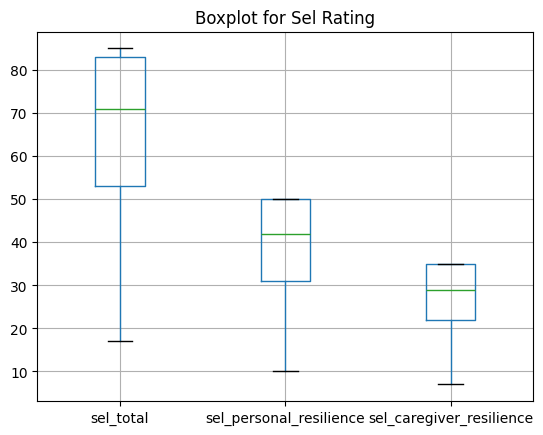

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

columns_to_plot = ['sel_total', 'sel_personal_resilience', 'sel_caregiver_resilience']

# 绘制箱形图
df_sel_five_scoring[columns_to_plot].boxplot()

# 显示图形
plt.title('Boxplot for Sel Rating')
plt.show()

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [25]:
X = df_sel_five_scoring.drop(columns=columns_to_plot)  
X = X.drop(columns=categorical_column)
y = df_sel_five_scoring['sel_total']  

# onehotencoder
categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols] = X[categorical_cols].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4514 entries, 82482 to 86997
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AcademicYearId           4514 non-null   int64  
 1   SchoolId                 4514 non-null   int64  
 2   ClassId                  4514 non-null   int64  
 3   ChildrenId               4514 non-null   int64  
 4   CommunicationIssue       4514 non-null   int64  
 5   MemoryConcentration      4514 non-null   int64  
 6   Hearing                  4514 non-null   int64  
 7   Vision                   4514 non-null   int64  
 8   Selfcare                 4514 non-null   int64  
 9   Walking/Climbing         4514 non-null   int64  
 10  IsElectricityAvailable?  4514 non-null   int64  
 11  IsRadioTVAvailable?      4514 non-null   int64  
 12  IsTelephoneAvailable?    4514 non-null   int64  
 13  ChildrenGrade            4514 non-null   int64  
 14  ChildrenAge             

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': np.arange(10, 310, 10),  # n_estimators
    'max_depth': np.arange(10, 50, 5), # max_depth
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_

Best parameters found: {'max_depth': np.int64(25), 'n_estimators': np.int64(170)}
Best cross-validation score: 0.708619652163649


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

y_pred = best_model.predict(X_test)

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')  # cv=5 
print(f'Cross-Validation R² Scores: {cv_scores}')
print(f'Mean Cross-Validation R² Score: {np.mean(cv_scores)}')

# check importance of different features
importances = best_model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importances)

Cross-Validation R² Scores: [0.21318376 0.43724103 0.69029428 0.23012045 0.53303843]
Mean Cross-Validation R² Score: 0.42077559048383006
ClassId                    0.336850
SchoolId                   0.150191
ChildrenId                 0.141190
self_esteem_life_skills    0.068194
OOSC_Child                 0.058621
menustral_bathing          0.032674
ChildrenGrade              0.029125
BirthOrder                 0.028228
ChildrenAge                0.015833
HomeLanguage               0.015546
menustral_age              0.013436
menustral_cloth            0.012529
menustral_frequency        0.012065
menustral_normal           0.012039
student_identity_type      0.011594
PrimaryCareGiver           0.009311
menustral_cycle            0.008735
ChildrenGender             0.006569
IsElectricityAvailable?    0.005837
IsRadioTVAvailable?        0.004199
Selfcare                   0.003835
IsBikeAvailable?           0.003783
HasMotorcycle              0.003047
HasTelevision              0.002867

## To be done

Decision Tree Accuracy: 0.26
|--- SchoolId <= 114.50
|   |--- ChildrenId <= 14755.00
|   |   |--- ChildrenId <= 13392.50
|   |   |   |--- ChildrenId <= 13318.00
|   |   |   |   |--- ClassId <= 375.50
|   |   |   |   |   |--- menustral_normal <= 0.50
|   |   |   |   |   |   |--- BirthOrder <= 9.50
|   |   |   |   |   |   |   |--- class: 62.0
|   |   |   |   |   |   |--- BirthOrder >  9.50
|   |   |   |   |   |   |   |--- class: 73.0
|   |   |   |   |   |--- menustral_normal >  0.50
|   |   |   |   |   |   |--- self_esteem_life_skills <= 5.50
|   |   |   |   |   |   |   |--- BirthOrder <= 4.50
|   |   |   |   |   |   |   |   |--- menustral_frequency <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 83.0
|   |   |   |   |   |   |   |   |--- menustral_frequency >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 75.0
|   |   |   |   |   |   |   |--- BirthOrder >  4.50
|   |   |   |   |   |   |   |   |--- class: 77.0
|   |   |   |   |   |   |--- self_esteem_life_skills >  5.50
|  

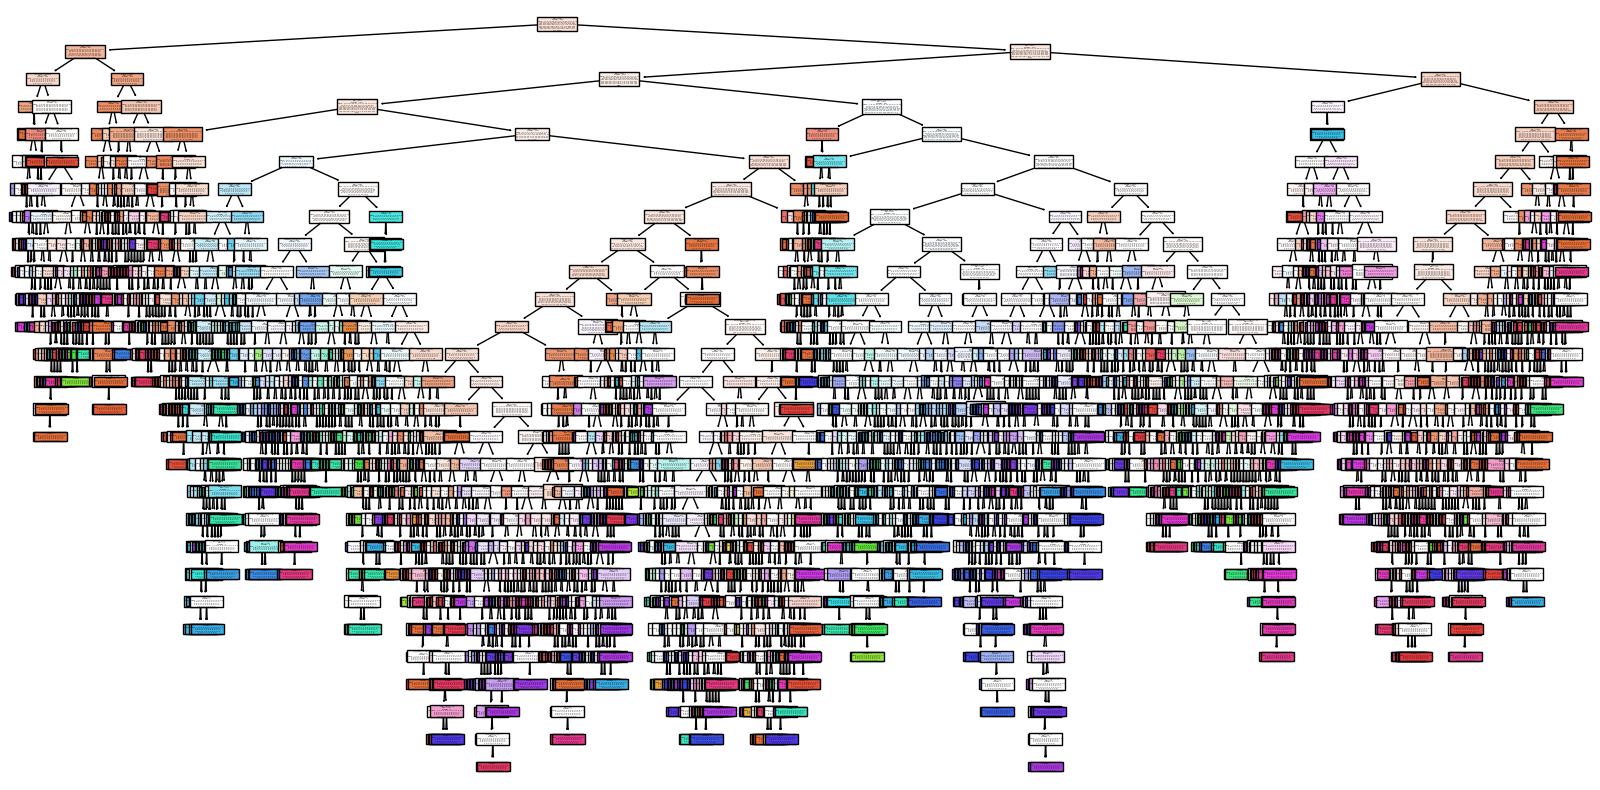

In [ ]:
# further analysis: decision tree classifier in different category of sel score(high, medium, low)

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# Build a decision tree classifier Set (random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Display the tree structure
tree_structure = export_text(tree_clf, feature_names=X.columns)
print(tree_structure)

# visualization
plt.figure(figsize=(20,10))  
plot_tree(tree_clf, feature_names=X.columns, filled=True)
plt.show()